In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans
import datetime as dt
from datetime import timedelta
from sklearn import preprocessing

## Data exploration ##

In [2]:
data = pd.read_excel("Data analyst technical assessment data.xlsx")

In [3]:
#initial review of spreadsheet shows some stock codes that don't follow the 5 digit format and look to be either large one off sums e.g. bad debt, postage or manual payments. Need to review further and decide how to treat these
#items where the description appears to be a genuine item are almost entirely valued at under £200, with none worth more than £650. All higher values look to fall into the categories above
#all invoice numbers with a C have a negative value in Quantity and there are no positive values in Quantity where the invoice number begins with a C


In [4]:
#review data by eye
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
#review data by eye
data.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#check data overall, including whether there are missing values
#demonstrates that there is a lot of missing customer IDs and a few descriptions and all other columns have entries in each row
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#review total numbers of transactions, products, countries and customers, including % where customer data is NA 
#shows a large proportion of customers with no ID
#large number of different products and customers
print("Transactions: ", data['InvoiceNo'].nunique())
print("Products: ",data['StockCode'].nunique())
print("Customers:", data['CustomerID'].nunique() )
print("Percentage of blank customer IDs: ", round(data['CustomerID'].isnull().sum() * 100 / len(data),2),"%" )
print('Countries: ',data['Country'].nunique())

Transactions:  25900
Products:  4070
Customers: 4372
Percentage of blank customer IDs:  24.93 %
Countries:  38


In [8]:
#review of quantitative data
#it shows some negative figures and initial review of spreadsheet shows these are cancelled orders
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
#review number of cancelled orders to see how they may affect the data
cancelled_orders = data[data['InvoiceNo'].astype(str).str.contains('C')]

In [10]:
#review number of cancelled orders
z = len(cancelled_orders)
z

9288

In [11]:
#percentage of cancelled orders based on total transactions found above
#high percentage so need to investigate any reasons for that and if it could be reduced
percent_cancelled_orders = 9288/25900
percent_cancelled_orders

0.3586100386100386

In [12]:
#retain copy of raw data before manipulating the data
raw_data = data.copy()

In [13]:
#some analysis to invovle total of each invoice so new column required to hold Quantity*UnitPrice
data.insert(6,"OrderValue",0)

In [14]:
data["OrderValue"] = data.Quantity * data.UnitPrice

In [15]:
#check new column looks correct
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,OrderValue,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,15.30,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,25.50,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,11.10,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,11.10,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,54.08,13047.0,United Kingdom


## CustomerID exploration ##

In [16]:
#review data broken down by customer
#removes rows with blank customer IDs, which should remove some of the large outlier figures
custID_data = (data.groupby('CustomerID').agg({'InvoiceNo': pd.Series.nunique, 'Quantity' : 'sum', 'OrderValue': 'sum'}).reset_index().rename(columns={'InvoiceNo': 'Frequency'}))


In [17]:
custID_data.head(10)

,CustomerID,Frequency,Quantity,OrderValue
0,12346.0,2,0,0.00
1,12347.0,7,2458,4310.00
2,12348.0,4,2341,1797.24
3,12349.0,1,631,1757.55
4,12350.0,1,197,334.40
5,12352.0,11,470,1545.41
6,12353.0,1,20,89.00
7,12354.0,1,530,1079.40
8,12355.0,1,240,459.40
9,12356.0,3,1591,2811.43


In [18]:
custID_data.describe()

,CustomerID,Frequency,Quantity,OrderValue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,5.075480,1122.344007,1898.459701
std,1722.390705,9.338754,4672.790720,8219.345141
min,12346.000000,1.000000,-303.000000,-4287.630000
25%,13812.750000,1.000000,153.000000,293.362500
50%,15300.500000,3.000000,365.000000,648.075000
75%,16778.250000,5.000000,962.250000,1611.725000
max,18287.000000,248.000000,196719.000000,279489.020000


In [19]:
#data above shows that customers order 5 times on average and 1122 items across all orders on average but there look to be outliers with the max and min values far away from the mean
#total amount spent per customer is £648 but again there are outliers with -£4,288 at the bottom and £279k at the top


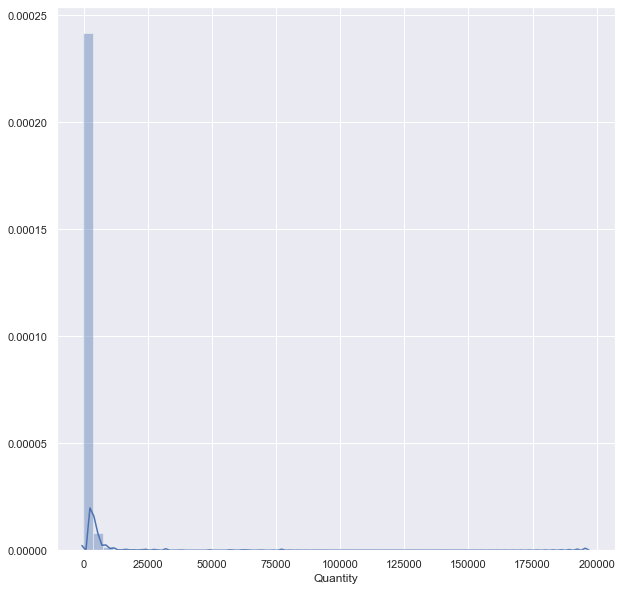

In [20]:
#review distribution of results
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.distplot(custID_data['Quantity'],ax=ax)
plt.show()

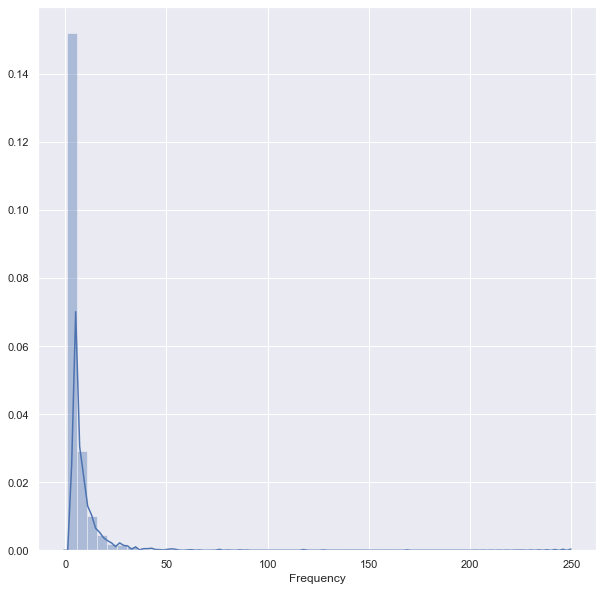

In [21]:
#review distribution of results
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.distplot(custID_data['Frequency'],ax=ax)
plt.show()

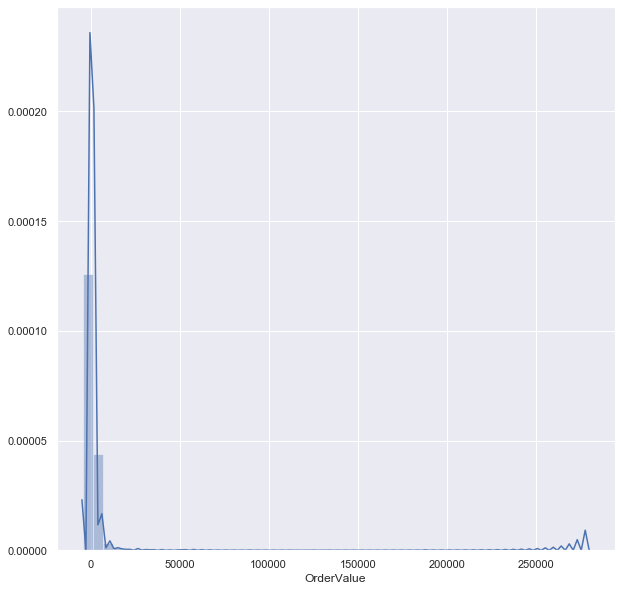

In [22]:
#review distribution of results
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.distplot(custID_data['OrderValue'],ax=ax)
plt.show()

In [23]:
#significant skew in the distributions above. Consider further prior to clustering

## Country data exploration ##

In [24]:
#review country data
country_data = data.groupby('Country').sum().sort_values(by='OrderValue', ascending=False)
country_data
                

,Quantity,UnitPrice,OrderValue,CustomerID
Country,,,,
United Kingdom,4263829,2.245715e+06,8.187806e+06,5.626433e+09
Netherlands,200128,6.492550e+03,2.846615e+05,3.419054e+07
EIRE,142637,4.844719e+04,2.632768e+05,1.103917e+08
Germany,117448,3.766600e+04,2.216982e+05,1.200751e+08
France,110480,4.303199e+04,1.974039e+05,1.076489e+08
Australia,83653,4.054750e+03,1.370773e+05,1.569300e+07
Switzerland,30325,6.813690e+03,5.638535e+04,2.377592e+07
Spain,26824,1.263345e+04,5.477458e+04,3.268929e+07
Belgium,23152,7.540130e+03,4.091096e+04,2.571829e+07


In [25]:
country_data.describe()


,Quantity,UnitPrice,OrderValue,CustomerID
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
mean,1.362224e+05,6.575800e+04,2.565197e+05,1.636704e+08
std,6.891771e+05,3.633898e+05,1.323506e+06,9.106251e+08
min,7.500000e+01,2.411000e+01,1.311700e+02,0.000000e+00
25%,9.950000e+02,5.221525e+02,2.053078e+03,1.266360e+06
50%,5.030500e+03,1.561895e+03,1.013568e+04,4.454632e+06
75%,2.470150e+04,6.742532e+03,3.628209e+04,1.514666e+07
max,4.263829e+06,2.245715e+06,8.187806e+06,5.626433e+09


In [26]:
#largest market is UK by some distance in terms of no. of customers and total spend


## Product data exploration ##

In [27]:
#review if certain products make up a large proportion of sales
product_data = (data.groupby('StockCode').agg({'Quantity': 'sum', 'OrderValue': 'sum'}).reset_index().rename(columns={'OrderValue': 'TotalValue'}))
product_data = product_data.sort_values(by="Quantity", ascending=False)
product_data.head(10)


,StockCode,Quantity,TotalValue
1070,22197,56450,50987.47
2622,84077,53847,13587.93
3659,85099B,47363,92356.03
3670,85123A,38830,97894.50
2735,84879,36221,58959.73
377,21212,36039,21059.72
1905,23084,30646,66756.59
1335,22492,26437,16810.42
1453,22616,26315,7972.76
889,21977,24753,12189.47


In [28]:
product_data.describe()

,Quantity,TotalValue
count,4070.000000,4070.000000
mean,1271.855037,2395.024062
std,3052.458716,7931.603222
min,-14418.000000,-221520.500000
25%,32.000000,95.197500
50%,300.500000,612.650000
75%,1279.500000,2087.657500
max,56450.000000,206245.480000


In [29]:
#some products are significantly more popular than others 
#average quantity is 1272 but max. is 56450
#average of the total value spent on each item also varies from a 2395 mean up to a 206245 max.


## Data analysis - K-means clustering ##

In [30]:
#begin process to cluster data so as to segment customers
#drop cancelled order; separate analysis can be carried out
clusterData = data.copy()
clusterData = clusterData[clusterData['Quantity']>0]
#focus on UK market only as it is such a large proportion of the data
clusterData = clusterData[clusterData['Country']=='United Kingdom']
clusterData.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,OrderValue,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,15.30,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,25.50,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,11.10,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,11.10,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,54.08,13047.0,United Kingdom


In [31]:
#remove blank customer IDs
clusterData.dropna(subset=['CustomerID'],how='all',inplace=True)

In [32]:
#add in date of last purchase in case time since last purchase is relevant to cluster customers
clusterData['date'] = clusterData['InvoiceDate'].dt.date
clusterData.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,OrderValue,CustomerID,Country,date
541884,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,2011-12-09 12:31:00,1.25,15.00,15804.0,United Kingdom,2011-12-09
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,10.20,15804.0,United Kingdom,2011-12-09
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,4.68,15804.0,United Kingdom,2011-12-09
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15.00,15804.0,United Kingdom,2011-12-09
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,11.40,15804.0,United Kingdom,2011-12-09
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,23.40,15804.0,United Kingdom,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,23.60,13113.0,United Kingdom,2011-12-09
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,30.00,13113.0,United Kingdom,2011-12-09
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,214.80,13113.0,United Kingdom,2011-12-09
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,70.80,13113.0,United Kingdom,2011-12-09


In [33]:
# Create last date customer could have purchased in the data
snapshot_date = clusterData['date'].max() + timedelta(days=1)

# Grouping by CustomerID and adding in days since last purchase
custID_cluster = clusterData.groupby(['CustomerID']).agg({
        'date': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': pd.Series.nunique, 
        'OrderValue': 'sum'}).reset_index().rename(columns={'InvoiceNo': 'Frequency', 'OrderValue' : 'Monetary' , 'date': 'Recency'})
custID_cluster.describe()


,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,92.722265,4.246111,1863.910113
std,1576.823683,99.528532,7.205750,7481.922217
min,12346.000000,1.000000,1.000000,0.000000
25%,14208.000000,18.000000,1.000000,300.040000
50%,15569.000000,51.000000,2.000000,651.820000
75%,16913.000000,143.000000,5.000000,1575.890000
max,18287.000000,374.000000,210.000000,259657.300000


In [34]:
#data not normally distributed so sklearn scale used in attempt to rectify this
custID_normal = custID_cluster
custID_normal = preprocessing.scale(custID_normal)
custID_normal = pd.DataFrame(custID_normal)

In [35]:
custID_normal.describe()

,0,1,2,3
count,3.921000e+03,3.921000e+03,3.921000e+03,3.921000e+03
mean,5.878151e-17,6.401975e-17,-1.046324e-15,-9.632449e-18
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00
min,-2.039468e+00,-9.216851e-01,-4.505464e-01,-2.491536e-01
25%,-8.584626e-01,-7.508580e-01,-4.505464e-01,-2.090465e-01
50%,4.775040e-03,-4.192525e-01,-3.117506e-01,-1.620232e-01
75%,8.572302e-01,5.052234e-01,1.046366e-01,-3.850038e-02
max,1.728713e+00,2.826462e+00,2.855777e+01,3.445990e+01


In [36]:
custID_normal = custID_normal.drop(0, axis=1)
custID_normal.corr()

,1,2,3
1,1.000000,-0.273779,-0.129449
2,-0.273779,1.000000,0.508512
3,-0.129449,0.508512,1.000000


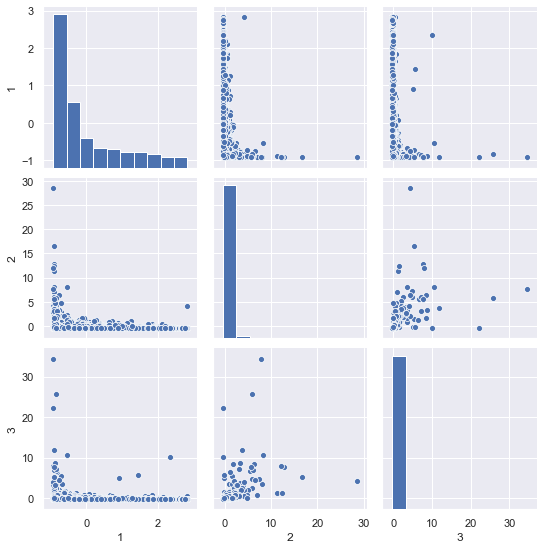

In [37]:
#relatively low negative correlation between recency and other factors
#stronger correlation between number of order and products purchase but both have alower correlation with total spend, suggesting some are less frequent, bulk pruchasers and others may buy little and often
#plot relationship between different factors, which shows the data is still nort normally distributed
sns.pairplot(custID_normal)

In [38]:
x = custID_normal.copy()

In [39]:
#using elbow method to determine number of clusters
#below within cluster sum of squares is calculated to plot the graph 
wcss=[]

for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

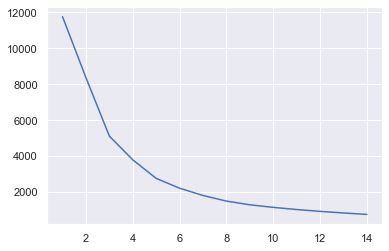

In [40]:
number_clusters = range(1,15)
plt.plot(number_clusters,wcss)

In [41]:
#I used different values of K and while a higher figure than 8 could be justified it gave a lot of small clusters with a few large ones and didnt seem to have more explamatory value than using 8
kmeans = KMeans(8)

In [42]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

In [44]:
clusters.tail(10)

,1,2,3,cluster_pred
3911,-0.901588,-0.172955,-0.221884,3
3912,-0.620226,-0.450546,-0.225638,3
3913,-0.489593,-0.450546,-0.204258,3
3914,-0.338863,-0.450546,-0.234399,3
3915,-0.188134,-0.450546,-0.225908,3
3916,1.861791,-0.450546,-0.225012,4
3917,0.887072,-0.450546,-0.238350,0
3918,-0.851345,-0.311751,-0.225353,3
3919,-0.891539,1.631390,0.030874,1
3920,-0.499642,-0.172955,-0.003560,3


(-5, 40)

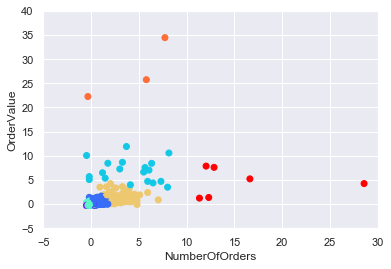

In [45]:
plt.scatter(clusters[2],clusters[3],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('NumberOfOrders')
plt.ylabel('OrderValue')
plt.xlim(-5,30)
plt.ylim(-5,40)


In [46]:
#scatter above shows that a few outliers skew the results. Despite attempting to normalise the data the outliers mean this data is not normally distributed
#review of the number of customers in each cluster, showing that many are in a few of the clusters with some clusters holding only a handful of customers

In [47]:
cluster0 = clusters[clusters['cluster_pred']==0]
cluster0.shape

(686, 4)

In [48]:
cluster1 = clusters[clusters['cluster_pred']==1]
cluster1.shape

(588, 4)

In [49]:
cluster2 = clusters[clusters['cluster_pred']==2]
cluster2.shape

(19, 4)

In [50]:
cluster3 = clusters[clusters['cluster_pred']==3]
cluster3.shape

(1968, 4)

In [51]:
cluster4 = clusters[clusters['cluster_pred']==4]
cluster4.shape

(539, 4)

In [52]:
cluster5 = clusters[clusters['cluster_pred']==5]
cluster5.shape

(112, 4)

In [53]:
cluster6 = clusters[clusters['cluster_pred']==6]
cluster6.shape

(3, 4)

In [54]:
cluster7 = clusters[clusters['cluster_pred']==7]
cluster7.shape

(6, 4)

In [55]:
#create data to use for visulations which has the clusters based on normalised data but transposed onto the original data prior to normalisation
custID_visual = custID_cluster.copy()
custID_visual['Cluster'] = clusters['cluster_pred']

In [56]:
custID_visual.head(10)

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,2
1,12747.0,3,11,4196.01,1
2,12748.0,1,210,33719.73,7
3,12749.0,4,5,4090.88,1
4,12820.0,4,4,942.34,3
5,12821.0,215,1,92.72,0
6,12822.0,71,2,948.88,3
7,12823.0,75,5,1759.50,3
8,12824.0,60,1,397.12,3
9,12826.0,3,7,1474.72,1


In [57]:
#cluster summary created for data visulations
cluster_summary = custID_visual.groupby(['Cluster']).agg({
        'Recency': 'mean', 
        'Frequency': 'mean', 'Monetary' : 'mean'})
cluster_summary.head(10)

,Recency,Frequency,Monetary
Cluster,,,
0,161.498542,2.075802,629.555235
1,21.761905,9.125850,3351.676735
2,46.526316,33.578947,53309.030000
3,39.679370,2.555894,851.723330
4,296.085343,1.304267,371.288460
5,12.437500,23.919643,10501.883929
6,3.666667,36.000000,207560.196667
7,2.166667,116.833333,36275.265000
